<br>Universidad del Valle de Guatemala
<br>Inteligencia Artificial
<br>Andrea Argüello 17801

<center> <b>Laboratorio</b> </center>

In [58]:
import numpy as np
import pandas as pd
from desc_gradiente import *
from matplotlib import pyplot as plt
import seaborn as sn
from mlxtend.preprocessing import minmax_scaling

In [2]:
def r_squared(X, y, theta_0):
 return (((y-y.mean())**2).sum()-((np.matmul(X, theta_0)-y)**2).sum())/((y-y.mean())**2).sum()

In [67]:
mse = lambda X, y, theta_0: ((np.matmul(X, theta_0) - y)**2).mean()
rmse = lambda X, y, theta_0: mse(X, y, theta_0)**0.5

In [5]:
#df = pd.read_csv(r'./Admission_Predict.csv')
#cols_to_norm = ['GRE Score', 'TOEFL Score', 'University Rating', 'CGPA', 'LOR ', 'SOP']

#shuffled = df.sample(frac=1)

#train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
#train.to_csv(path_or_buf='./train.csv',index=False)
#test.to_csv(path_or_buf='./test.csv',index=False)
#validate.to_csv(path_or_buf='./validate.csv',index=False)

In [3]:
train = pd.read_csv(r'./train.csv')
test = pd.read_csv(r'./test.csv')
validate = pd.read_csv(r'./validate.csv')
print(train,test,validate)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           251        320          104                  3  3.0   2.5  8.57   
1           336        325          111                  4  4.0   4.5  9.11   
2           318        300           99                  1  1.0   2.5  8.01   
3            63        304          105                  2  3.0   3.0  8.20   
4            28        298           98                  2  1.5   2.5  7.50   
..          ...        ...          ...                ...  ...   ...   ...   
235         193        322          114                  5  4.5   4.0  8.94   
236         202        315          110                  2  3.5   3.0  8.46   
237         246        328          110                  4  4.0   2.5  9.02   
238         171        312          101                  2  2.5   3.5  8.04   
239          31        300           97                  2  3.0   3.0  8.10   

     Research  Chance of Admit   
0           1    

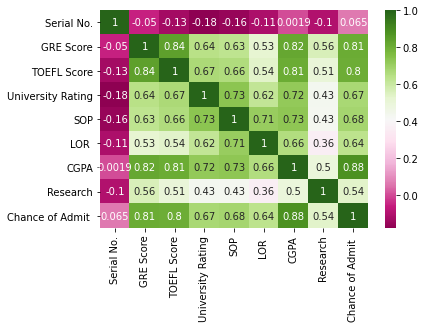

In [4]:
sn.heatmap(train.corr(), annot=True, cmap="PiYG")

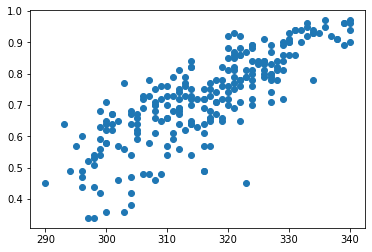

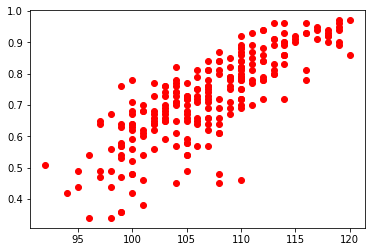

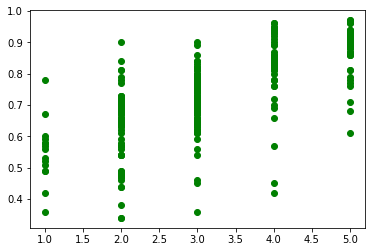

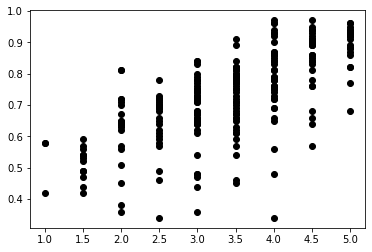

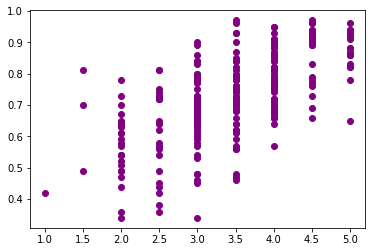

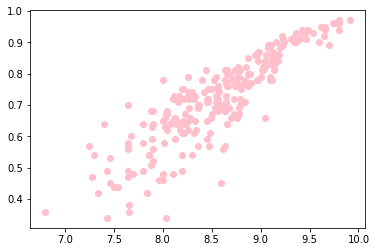

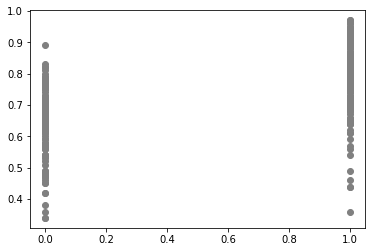

In [5]:
plt.scatter(train[['GRE Score']], train[['Chance of Admit ']])
plt.show()
plt.scatter(train[['TOEFL Score']], train[['Chance of Admit ']], color="red")
plt.show()
plt.scatter(train[['University Rating']], train[['Chance of Admit ']], color="green")
plt.show()
plt.scatter(train[['SOP']], train[['Chance of Admit ']], color="black")
plt.show()
plt.scatter(train[['LOR ']], train[['Chance of Admit ']], color="purple")
plt.show()
plt.scatter(train[['CGPA']], train[['Chance of Admit ']], color="pink")
plt.show()
plt.scatter(train[['Research']], train[['Chance of Admit ']], color="gray")
plt.show()

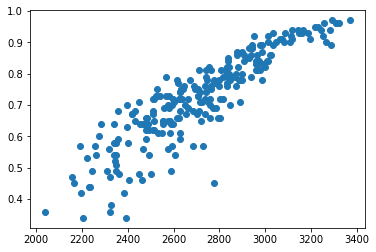

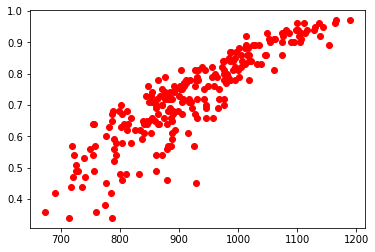

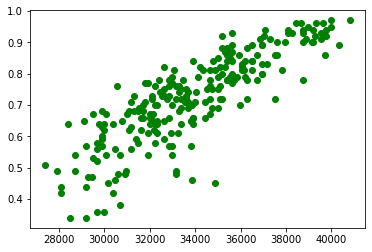

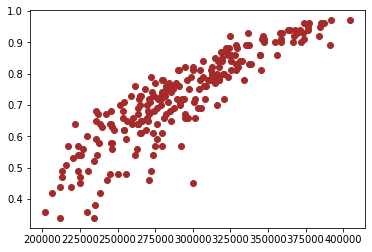

In [6]:
plt.scatter(train[['CGPA']].to_numpy()*train[['GRE Score']].to_numpy(), train[['Chance of Admit ']])
plt.show()
plt.scatter(train[['CGPA']].to_numpy()*train[['TOEFL Score']].to_numpy(), train[['Chance of Admit ']], color="red")
plt.show()
plt.scatter(train[['GRE Score']].to_numpy()*train[['TOEFL Score']].to_numpy(), train[['Chance of Admit ']], color="green")
plt.show()
plt.scatter(train[['CGPA']].to_numpy()*train[['GRE Score']].to_numpy()*train[['TOEFL Score']].to_numpy(), train[['Chance of Admit ']], color="brown")
plt.show()

Debido a que están en escalas distintas, se decidió normalizar las calificaciones del GRE score, TOEFL y CGPA, basándose no en los mínimos presentes en la base de datos, sino en las calificaciones máximas y mínimas posibles, basasdo en los siguientes links:
<ul>
    <li>https://www.ets.org/gre/revised_general/scores/how/</li>
    <li>https://en.wikipedia.org/wiki/Test_of_English_as_a_Foreign_Language</li>
    <li>https://www.admitkard.com/blog/2019/11/14/cgpa-to-percentage/</li>
</ul>

Y se decidió volver a evaluar las gráficas anteriores, para ver si las relaciones se mantienen.

In [7]:
norm_gre = lambda gre_score: (gre_score-260)/(340-260)
norm_toefl = lambda toefl: toefl/120
norm_cgpa = lambda cgpa: cgpa/10

In [8]:
train['GRE Score'] = train['GRE Score'].apply(norm_gre)
validate['GRE Score'] = validate['GRE Score'].apply(norm_gre)
test['GRE Score'] = test['GRE Score'].apply(norm_gre)

train['TOEFL Score'] = train['TOEFL Score'].apply(norm_toefl)
validate['TOEFL Score'] = validate['TOEFL Score'].apply(norm_toefl)
test['TOEFL Score'] = test['TOEFL Score'].apply(norm_toefl)

train['CGPA'] = train['CGPA'].apply(norm_cgpa)
validate['CGPA'] = validate['CGPA'].apply(norm_cgpa)
test['CGPA'] = test['CGPA'].apply(norm_cgpa)

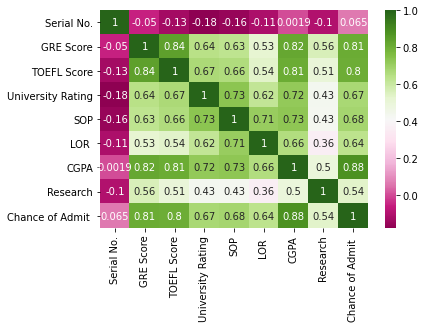

In [11]:
sn.heatmap(train.corr(), annot=True, cmap="PiYG")

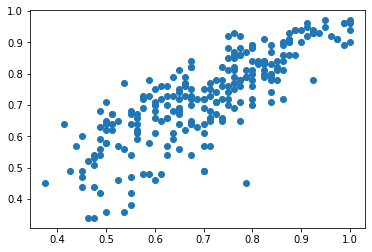

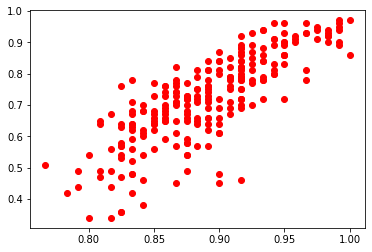

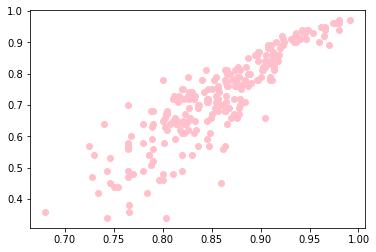

In [13]:
plt.scatter(train[['GRE Score']], train[['Chance of Admit ']])
plt.show()
plt.scatter(train[['TOEFL Score']], train[['Chance of Admit ']], color="red")
plt.show()
plt.scatter(train[['CGPA']], train[['Chance of Admit ']], color="pink")
plt.show()

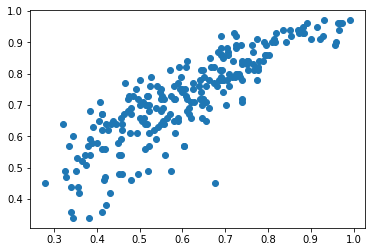

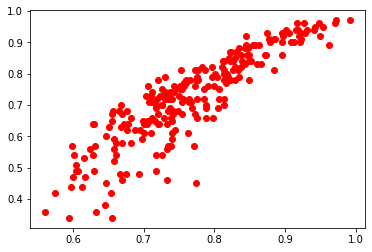

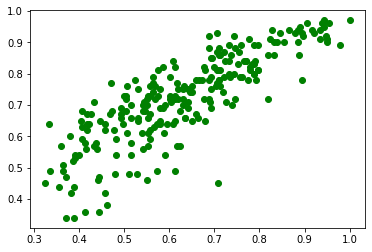

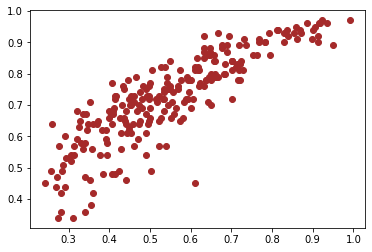

In [14]:
plt.scatter(train[['CGPA']].to_numpy()*train[['GRE Score']].to_numpy(), train[['Chance of Admit ']])
plt.show()
plt.scatter(train[['CGPA']].to_numpy()*train[['TOEFL Score']].to_numpy(), train[['Chance of Admit ']], color="red")
plt.show()
plt.scatter(train[['GRE Score']].to_numpy()*train[['TOEFL Score']].to_numpy(), train[['Chance of Admit ']], color="green")
plt.show()
plt.scatter(train[['CGPA']].to_numpy()*train[['GRE Score']].to_numpy()*train[['TOEFL Score']].to_numpy(), train[['Chance of Admit ']], color="brown")
plt.show()

Debido a que las variables University Rating, SOP, LOR y Research son más categóricas, se excluirán estas de cualquier modelo. Además, según <i>Estadística para negocios y economía</i> (12a Ed.) de Anderson, Sweeney, Williams, Camm y Cochran, para considerar la correlación como significativa, esta debe ser de más de |0.7|. Por lo tanto, se consideró tomar en cuenta las interacciones/multiplicaciones de varios factores multiplicados entre sí. Estos se presentan a continuación.
Se decidió, con base en estas gráficas, evaluar el accuracy de dos modelos: uno multivariable, utilizando Gre Score, CGPA y la multiplicación entre ambas, y uno univariable utilizando la multiplicación de TOEFL, GRE y CGPA.

# Modelo multivariable
#### GRE, CGPA y GRE x CGPA

In [15]:
#Tomando variables con mas de 75% de correlacion
train_mod = train
train_mod['GRE x CGPA'] = train_mod['CGPA']*train_mod['GRE Score']
train_x = train_mod[['CGPA', 'GRE Score', 'GRE x CGPA']].T

In [16]:
print(train_mod[['CGPA', 'GRE Score', 'GRE x CGPA']])
print(train_x)

      CGPA  GRE Score  GRE x CGPA
0    0.857     0.7500    0.642750
1    0.911     0.8125    0.740187
2    0.801     0.5000    0.400500
3    0.820     0.5500    0.451000
4    0.750     0.4750    0.356250
..     ...        ...         ...
235  0.894     0.7750    0.692850
236  0.846     0.6875    0.581625
237  0.902     0.8500    0.766700
238  0.804     0.6500    0.522600
239  0.810     0.5000    0.405000

[240 rows x 3 columns]
                0         1       2      3        4        5       6    \
CGPA        0.85700  0.911000  0.8010  0.820  0.75000  0.87900  0.8460   
GRE Score   0.75000  0.812500  0.5000  0.550  0.47500  0.65000  0.6500   
GRE x CGPA  0.64275  0.740187  0.4005  0.451  0.35625  0.57135  0.5499   

                 7         8         9    ...      230    231     232     233  \
CGPA        0.970000  0.765000  0.826000  ...  0.78000  0.966  0.7660  0.8840   
GRE Score   0.987500  0.537500  0.637500  ...  0.41250  1.000  0.5500  0.7750   
GRE x CGPA  0.957875  0.4111

In [17]:
train_X = np.vstack(
    (
        np.ones(train_x.shape[1]),
        train_x
    )
).T

train_m, train_n = train_X.shape

print(train_X,train_X.shape)

train_theta_0 = np.random.rand(train_n, 1)
print(train_theta_0, train_theta_0.shape)

[[1.        0.857     0.75      0.64275  ]
 [1.        0.911     0.8125    0.7401875]
 [1.        0.801     0.5       0.4005   ]
 [1.        0.82      0.55      0.451    ]
 [1.        0.75      0.475     0.35625  ]
 [1.        0.879     0.65      0.57135  ]
 [1.        0.846     0.65      0.5499   ]
 [1.        0.97      0.9875    0.957875 ]
 [1.        0.765     0.5375    0.4111875]
 [1.        0.826     0.6375    0.526575 ]
 [1.        0.856     0.7125    0.6099   ]
 [1.        0.832     0.7       0.5824   ]
 [1.        0.919     0.8625    0.7926375]
 [1.        0.88      0.775     0.682    ]
 [1.        0.94      0.825     0.7755   ]
 [1.        0.936     0.875     0.819    ]
 [1.        0.98      0.9875    0.96775  ]
 [1.        0.796     0.525     0.4179   ]
 [1.        0.734     0.4875    0.357825 ]
 [1.        0.856     0.7       0.5992   ]
 [1.        0.802     0.625     0.50125  ]
 [1.        0.947     0.9       0.8523   ]
 [1.        0.83      0.8375    0.695125 ]
 [1.       

In [18]:
train_y = train[['Chance of Admit ']].to_numpy()
print(train_y, train_y.shape)
#lambda_0 = ran

[[0.74]
 [0.83]
 [0.58]
 [0.54]
 [0.44]
 [0.81]
 [0.75]
 [0.89]
 [0.56]
 [0.79]
 [0.68]
 [0.72]
 [0.86]
 [0.76]
 [0.91]
 [0.93]
 [0.96]
 [0.46]
 [0.42]
 [0.75]
 [0.66]
 [0.94]
 [0.74]
 [0.45]
 [0.82]
 [0.67]
 [0.73]
 [0.67]
 [0.91]
 [0.7 ]
 [0.9 ]
 [0.42]
 [0.48]
 [0.74]
 [0.7 ]
 [0.78]
 [0.78]
 [0.57]
 [0.89]
 [0.72]
 [0.81]
 [0.89]
 [0.64]
 [0.88]
 [0.78]
 [0.72]
 [0.77]
 [0.8 ]
 [0.69]
 [0.7 ]
 [0.63]
 [0.66]
 [0.89]
 [0.92]
 [0.69]
 [0.87]
 [0.81]
 [0.93]
 [0.86]
 [0.65]
 [0.84]
 [0.72]
 [0.72]
 [0.76]
 [0.72]
 [0.97]
 [0.48]
 [0.79]
 [0.67]
 [0.75]
 [0.7 ]
 [0.72]
 [0.61]
 [0.82]
 [0.78]
 [0.75]
 [0.57]
 [0.58]
 [0.84]
 [0.84]
 [0.73]
 [0.9 ]
 [0.86]
 [0.56]
 [0.71]
 [0.73]
 [0.57]
 [0.47]
 [0.78]
 [0.65]
 [0.84]
 [0.79]
 [0.9 ]
 [0.71]
 [0.96]
 [0.62]
 [0.75]
 [0.87]
 [0.94]
 [0.8 ]
 [0.76]
 [0.47]
 [0.57]
 [0.68]
 [0.66]
 [0.97]
 [0.94]
 [0.81]
 [0.61]
 [0.66]
 [0.77]
 [0.64]
 [0.54]
 [0.59]
 [0.84]
 [0.59]
 [0.82]
 [0.84]
 [0.84]
 [0.71]
 [0.54]
 [0.91]
 [0.6 ]
 [0.93]
 [0.46]


In [19]:
print(gradiente_linear_cost(train_X, train_y, train_theta_0))

[[1.45602462]
 [1.25230182]
 [1.03560489]
 [0.90110749]]


In [20]:
print(train_theta_0)
train_theta_backup = train_theta_0

[[0.79648812]
 [0.80050822]
 [0.37072977]
 [0.71517497]]


In [21]:
# print(train_theta_0)
# print(np.matmul(train_X,train_theta_0))
# print((np.matmul(train_X,train_theta_0)-train_y)**2)
thetas, costs, gradient_norms = gradient_descent(train_X, train_y, train_theta_0, cost=linear_cost_reg, cost_derivative=gradiente_linear_cost_reg, alpha=0.01, threshold=0.00001, max_iter=50000)
print(thetas)

[[-0.07413834]
 [ 0.53952142]
 [-0.06597129]
 [ 0.62539565]]


<IPython.core.display.Javascript object>


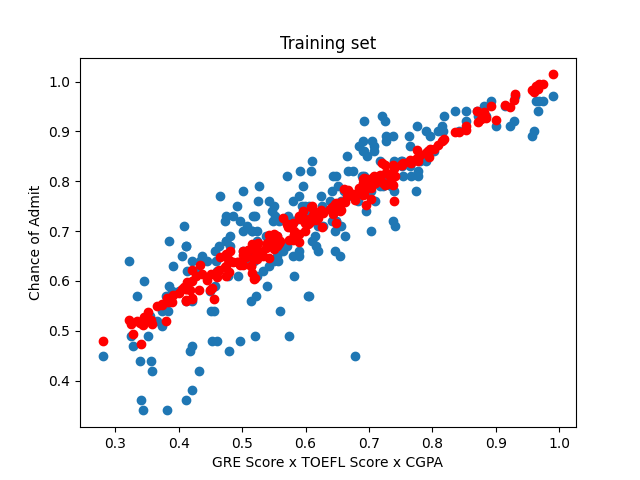

In [129]:
%matplotlib notebook
plt.scatter(train_X[:, 3], train_y)

plt.scatter(train_X[:, 3], np.matmul(train_X, thetas), color='red')

plt.title('Training set')
plt.xlabel('GRE Score x TOEFL Score x CGPA')
plt.ylabel('Chance of Admit')


plt.show()

In [127]:
print(((np.matmul(train_X, thetas)-train_y)*100/train_y).mean())
print(((np.matmul(train_X, thetas)-train_y)*100/train_y).max())
print(((np.matmul(train_X, thetas)-train_y)*100/train_y).min())

#calculating r²
print('R²:',r_squared(train_X, train_y, thetas))
print('RMSE:', rmse(train_X, train_y, thetas))

1.51595390904477
69.21042086768949
-18.6412089173075
R²: 0.7722702846448828
RMSE: 0.06780463974085414


<IPython.core.display.Javascript object>


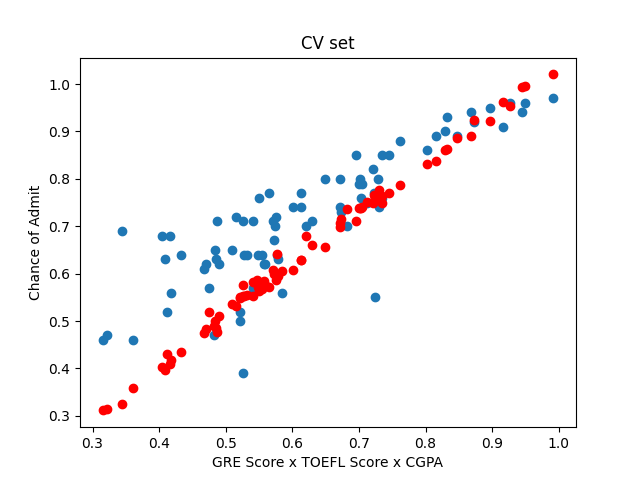

In [130]:
validate['GRE x CGPA'] = validate['GRE Score']*validate['CGPA']
cv_x = validate[['GRE Score','CGPA', 'GRE x CGPA']].to_numpy().T
cv_X = np.vstack(
    (
        np.ones(cv_x.shape[1]),
        cv_x,
    )
).T

cv_m, cv_n = cv_X.shape

cv_y=validate[['Chance of Admit ']].to_numpy()
%matplotlib notebook
plt.scatter(cv_X[:, 3], cv_y)

plt.scatter(cv_X[:, 3], np.matmul(cv_X, thetas), color='red')

plt.title('CV set')
plt.xlabel('GRE Score x TOEFL Score x CGPA')
plt.ylabel('Chance of Admit')


plt.show()

In [128]:
print(((np.matmul(cv_X, thetas)-cv_y)*100/cv_y).mean())
print(((np.matmul(cv_X, thetas)-cv_y)*100/cv_y).max())
print(((np.matmul(cv_X, thetas)-cv_y)*100/cv_y).min())

#Calcuting r²
print('R²:',r_squared(cv_X, cv_y, thetas))
print('RMSE:', rmse(cv_X, cv_y, thetas))

-10.163058743197862
47.49580092411166
-52.883076011849845
R²: 0.2385621843041257
RMSE: 0.11816452110450593


<IPython.core.display.Javascript object>


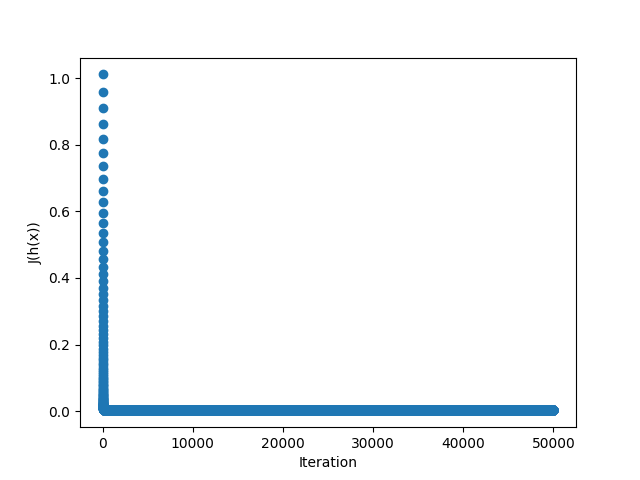

In [116]:
%matplotlib notebook
plt.scatter(np.arange(0,len(costs)), costs)

plt.xlabel('Iteration')
plt.ylabel('J(h(x))')

plt.show()

<IPython.core.display.Javascript object>


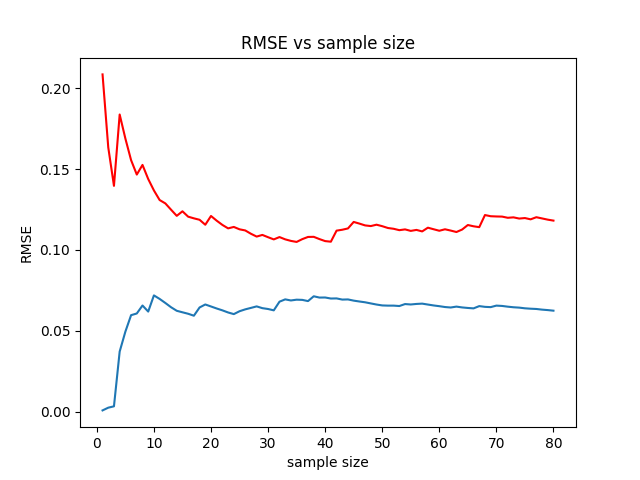

In [218]:
rmse_train_size_og=[]
rmse_cv_size_og=[]

for i in range(1,cv_X.shape[0]+1,1):
    rmse_train_size_og.append(rmse(train_X[0:i], train_y[0:i], thetas))
    rmse_cv_size_og.append(rmse(cv_X[0:i], cv_y[0:i], thetas))

%matplotlib notebook
plt.plot(range(1,cv_X.shape[0]+1,1), rmse_train_size_og)

plt.plot(range(1,cv_X.shape[0]+1,1), rmse_cv_size_og, color='red')

plt.title('RMSE vs sample size')
plt.xlabel('sample size')
plt.ylabel('RMSE')


plt.show()

### Resultados de este modelo
Se intentó realizar un modelo multilineal, utilizando las dos variables que muestran mayor correlación con el chance of admit. A pesar de que parece ser un modelo aceptable para el training set, claramente presenta bias ante el cross validation set.

Estop queda evidenciado en el gráfico de RSME vs Sample size, ya que el cross validation set no parece verse afectado mucho a aprtir de los 30 datos en el set, al igual que el R² es demasiado bajo, siendo este de 0.23.

# Nuevo modelo univariable, con varios degrees
### CGPA x GRE x TOEFL
Según las gráficas de interacciones, este es el modelo que parece tener una relación más clara con respecto a Chance of Admit.

In [28]:
train['CGPA x GRE x TOEFL'] = train[['CGPA']].to_numpy()*train[['GRE Score']].to_numpy()*train[['TOEFL Score']]
train_x2 = train[['CGPA x GRE x TOEFL']].to_numpy().T

train_X2 = np.vstack((
    np.ones(train_x2.shape[1]),
    train_x2
)).T

train_x2_theta_0 = np.random.rand(train_X2.shape[1], 1)

thetas2, costs2, gradient_norms2 = gradient_descent(train_X2, train_y, train_x2_theta_0, cost=linear_cost_reg, cost_derivative=gradiente_linear_cost_reg, alpha=0.01, threshold=0.00001, max_iter=50000)

In [29]:
print(train_X2)

[[1.         0.55705   ]
 [1.         0.68467344]
 [1.         0.3304125 ]
 [1.         0.394625  ]
 [1.         0.2909375 ]
 [1.         0.5046925 ]
 [1.         0.4903275 ]
 [1.         0.94989271]
 [1.         0.33580312]
 [1.         0.46514125]
 [1.         0.5336625 ]
 [1.         0.51445333]
 [1.         0.75300563]
 [1.         0.61948333]
 [1.         0.7302625 ]
 [1.         0.7917    ]
 [1.         0.93549167]
 [1.         0.3517325 ]
 [1.         0.28029625]
 [1.         0.54926667]
 [1.         0.4260625 ]
 [1.         0.838095  ]
 [1.         0.59664896]
 [1.         0.24245   ]
 [1.         0.53771062]
 [1.         0.33608896]
 [1.         0.45294375]
 [1.         0.343375  ]
 [1.         0.86242812]
 [1.         0.5441375 ]
 [1.         0.768075  ]
 [1.         0.35933333]
 [1.         0.4071375 ]
 [1.         0.53462104]
 [1.         0.4512375 ]
 [1.         0.72193333]
 [1.         0.59953833]
 [1.         0.5230225 ]
 [1.         0.73638094]
 [1.         0.701385  ]


<IPython.core.display.Javascript object>


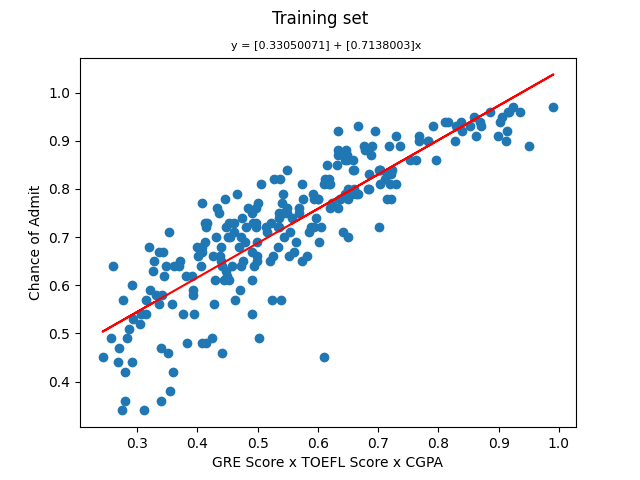

In [227]:
%matplotlib notebook
plt.scatter(train_X2[:, 1], train_y)

plt.plot(train_X2[:, 1], np.matmul(train_X2, thetas2), color='red')

plt.suptitle('Training set')
plt.title('y = {} + {}x '.format(np.array2string(thetas2[0]),np.array2string(thetas2[1])), size='8')
plt.xlabel('GRE Score x TOEFL Score x CGPA')
plt.ylabel('Chance of Admit')


plt.show()

<IPython.core.display.Javascript object>


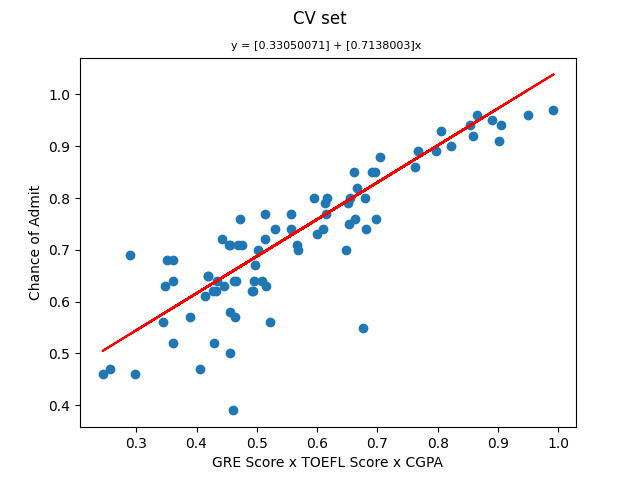

In [225]:
validate['CGPA x GRE x TOEFL'] = validate[['CGPA']].to_numpy()*validate[['GRE Score']].to_numpy()*validate[['TOEFL Score']]
cv_x2 = validate[['CGPA x GRE x TOEFL']].to_numpy().T

cv_X2 = np.vstack((
    np.ones(cv_x2.shape[1]),
    cv_x2
)).T

%matplotlib notebook
plt.scatter(cv_X2[:, 1], cv_y)

plt.plot(cv_X2[:, 1], np.matmul(cv_X2, thetas2), color='red')

plt.suptitle('CV set')
plt.title('y = {} + {}x '.format(np.array2string(thetas2[0]),np.array2string(thetas2[1])), size='8')
plt.xlabel('GRE Score x TOEFL Score x CGPA')
plt.ylabel('Chance of Admit')


plt.show()

In [220]:
print('R² training:',r_squared(train_X2, train_y, thetas2))
print('R² cross validation:',r_squared(cv_X2, cv_y, thetas2))
print('RMSE training:', rmse(train_X2, train_y, thetas2))
print('RMSE cross validation:', rmse(cv_X2, cv_y, thetas2))

R² training: 0.7352223285163247
R² cross validation: 0.7239534869721826
RMSE training: 0.07311226533579572
RMSE cross validation: 0.07114772392298178


<IPython.core.display.Javascript object>


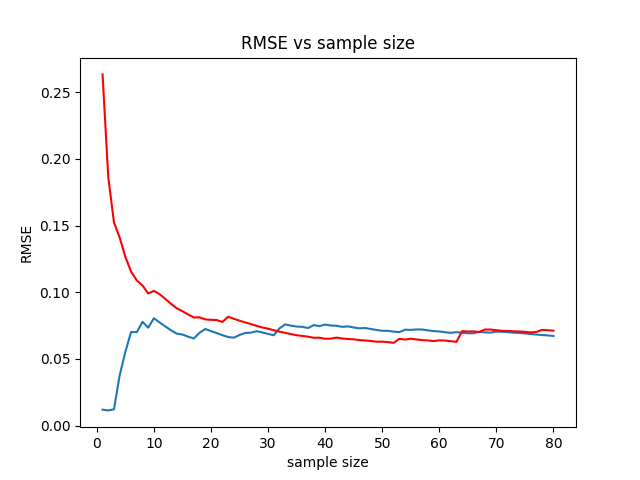

In [219]:
rmse_train_size_x2=[]
rmse_cv_size_x2=[]

for i in range(1,cv_X2.shape[0]+1,1):
    rmse_train_size_x2.append(rmse(train_X2[0:i], train_y[0:i], thetas2))
    rmse_cv_size_x2.append(rmse(cv_X2[0:i], cv_y[0:i], thetas2))

%matplotlib notebook
plt.plot(range(1,cv_X2.shape[0]+1,1), rmse_train_size_x2)

plt.plot(range(1,cv_X2.shape[0]+1,1), rmse_cv_size_x2, color='red')

plt.title('RMSE vs sample size')
plt.xlabel('sample size')
plt.ylabel('RMSE')


plt.show()

Este modelo está, según el R² y RMSE, al igual que al comparar RMSE y el sample size, bastante bien. No parece presentar bias ni variance. Sin embargo, vale la pena evaluar si se puede obtener un mejor modelo utilizando más features y regularizando. Esto haremos a continuación.

### Utilizando features/aumentando los degrees

In [68]:
train_X2_2 = np.vstack((
    np.ones(train_x2.shape[1]),
    train_x2,
    train_x2**2
)).T
train_X2_3 = np.vstack((
    np.ones(train_x2.shape[1]),
    train_x2,
    train_x2**2,
    train_x2**3,
)).T
train_X2_4 = np.vstack((
    np.ones(train_x2.shape[1]),
    train_x2,
    train_x2**2,
    train_x2**3,
    train_x2**4,
)).T
train_X2_5 = np.vstack((
    np.ones(train_x2.shape[1]),
    train_x2,
    train_x2**2,
    train_x2**3,
    train_x2**4,
    train_x2**5,
)).T
train_X2_6 = np.vstack((
    np.ones(train_x2.shape[1]),
    train_x2,
    train_x2**2,
    train_x2**3,
    train_x2**4,
    train_x2**5,
    train_x2**6,
)).T
train_X2_7 = np.vstack((
    np.ones(train_x2.shape[1]),
    train_x2,
    train_x2**2,
    train_x2**3,
    train_x2**4,
    train_x2**5,
    train_x2**6,
    train_x2**7,
)).T

cv_X2_2 = np.vstack((
    np.ones(cv_x2.shape[1]),
    cv_x2,
    cv_x2**2,
)).T
cv_X2_3 = np.vstack((
    np.ones(cv_x2.shape[1]),
    cv_x2,
    cv_x2**2,
    cv_x2**3,
)).T
cv_X2_4 = np.vstack((
    np.ones(cv_x2.shape[1]),
    cv_x2,
    cv_x2**2,
    cv_x2**3,
    cv_x2**4,
)).T
cv_X2_5 = np.vstack((
    np.ones(cv_x2.shape[1]),
    cv_x2,
    cv_x2**2,
    cv_x2**3,
    cv_x2**4,
    cv_x2**5,
)).T
cv_X2_6 = np.vstack((
    np.ones(cv_x2.shape[1]),
    cv_x2,
    cv_x2**2,
    cv_x2**3,
    cv_x2**4,
    cv_x2**5,
    cv_x2**6,
)).T
cv_X2_7 = np.vstack((
    np.ones(cv_x2.shape[1]),
    cv_x2,
    cv_x2**2,
    cv_x2**3,
    cv_x2**4,
    cv_x2**5,
    cv_x2**6,
    cv_x2**7,
)).T

In [70]:
poly_trains_X2 = [train_X2, train_X2_2, train_X2_3,train_X2_4,train_X2_5,train_X2_6,train_X2_7]
poly_cvs_X2 = [cv_X2, cv_X2_2, cv_X2_3,cv_X2_4,cv_X2_5,cv_X2_6,cv_X2_7]
poly_thetas = []
poly_train_rmses = []
poly_cv_rmses = []


for i in np.arange(0,len(poly_trains_X2),1):
    train_theta_x2 = np.random.rand(poly_trains_X2[i].shape[1], 1)
    thetas_xi, costs_xi, norms_xi = gradient_descent(poly_trains_X2[i], train_y, train_theta_x2, cost=linear_cost_reg, cost_derivative=gradiente_linear_cost_reg, alpha=0.01, threshold=0.00001, max_iter=50000)
    poly_thetas.append(thetas_xi)
    poly_train_rmses.append(rmse(poly_trains_X2[i], train_y, thetas_xi))
    poly_cv_rmses.append(rmse(poly_cvs_X2[i], cv_y, thetas_xi))

<IPython.core.display.Javascript object>


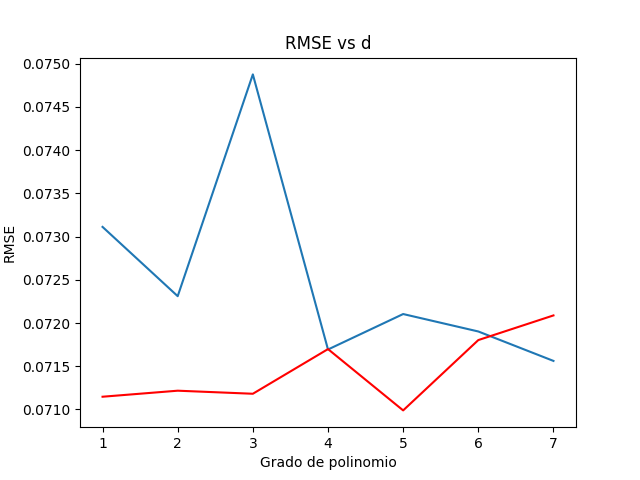

In [109]:
# Grafica de root mean square error vs degree
%matplotlib notebook
plt.plot(np.arange(1,len(poly_trains_X2)+1,1), poly_train_rmses)

plt.plot(np.arange(1,len(poly_trains_X2)+1,1), poly_cv_rmses, color='red')

plt.title('RMSE vs d')
plt.xlabel('Grado de polinomio')
plt.ylabel('RMSE')

plt.show()

<IPython.core.display.Javascript object>


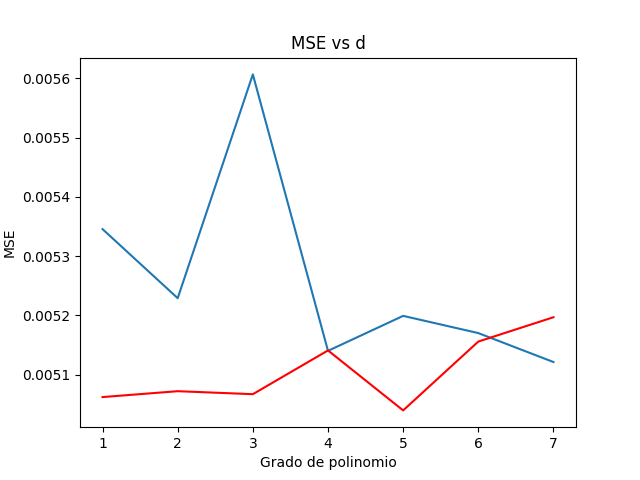

In [110]:
# Grafica de mean squared error vs degree
%matplotlib notebook
plt.plot(np.arange(1,len(poly_trains_X2)+1,1), np.asarray(poly_train_rmses)**2)

plt.plot(np.arange(1,len(poly_trains_X2)+1,1), np.asarray(poly_cv_rmses)**2, color='red')

plt.title('MSE vs d')
plt.xlabel('Grado de polinomio')
plt.ylabel('MSE')


plt.show()

Con base en esta gráfica, parece una buena decisión usar el grado 4.

In [ ]:
%matplotlib notebook
plt.scatter(train_X2[:,1], train_y)

plt.scatter(train_X2[:,1], np.matmul(train_X2, poly_thetas[3]), color='red')

plt.title('Training set')
plt.xlabel('GRE Score x TOEFL Score x CGPA')
plt.ylabel('Chance of Admit')


plt.show()

<IPython.core.display.Javascript object>


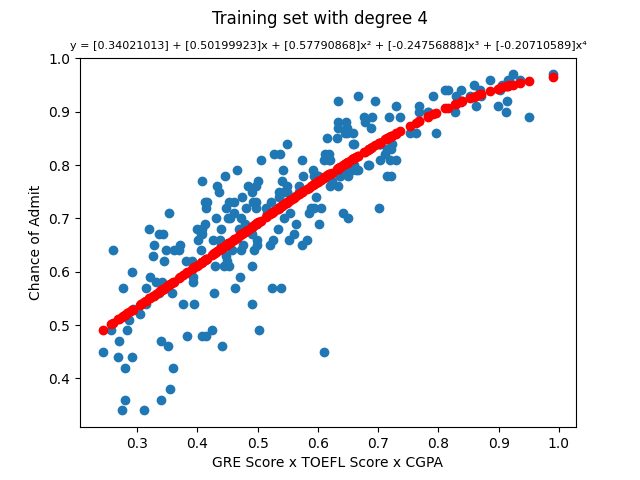

In [151]:
%matplotlib notebook
plt.scatter(train_X2_4[:,1], train_y)

plt.scatter(train_X2_4[:,1], np.matmul(train_X2_4, poly_thetas[3]), color='red')

plt.suptitle('Training set with degree 4')
plt.title('y = {} + {}x + {}x² + {}x³ + {}x⁴'.format(np.array2string(poly_thetas[3][0]),np.array2string(poly_thetas[3][1]),np.array2string(poly_thetas[3][2]),np.array2string(poly_thetas[3][3]),np.array2string(poly_thetas[3][4])), size='8')
plt.xlabel('GRE Score x TOEFL Score x CGPA')
plt.ylabel('Chance of Admit')


plt.show()

<IPython.core.display.Javascript object>


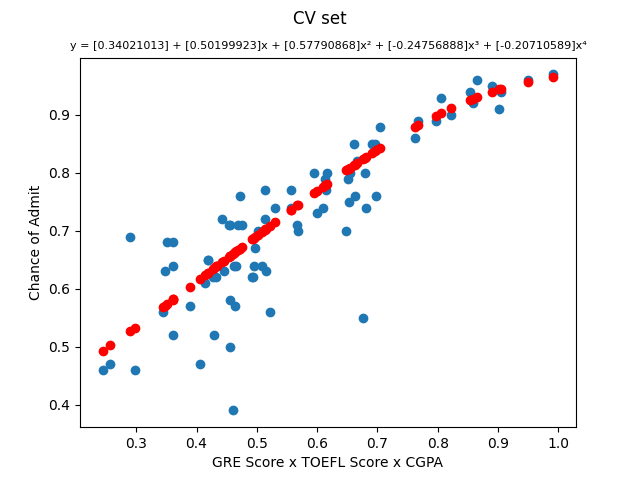

In [153]:
%matplotlib notebook
plt.scatter(cv_X2_4[:,1], cv_y)

plt.scatter(cv_X2_4[:,1], np.matmul(cv_X2_4, poly_thetas[3]), color='red')

plt.suptitle('CV set')
plt.title('y = {} + {}x + {}x² + {}x³ + {}x⁴'.format(np.array2string(poly_thetas[3][0]),np.array2string(poly_thetas[3][1]),np.array2string(poly_thetas[3][2]),np.array2string(poly_thetas[3][3]),np.array2string(poly_thetas[3][4])), size='8')
plt.xlabel('GRE Score x TOEFL Score x CGPA')
plt.ylabel('Chance of Admit')


plt.show()

In [104]:
print('R² training degree 4:',r_squared(train_X2_4, train_y, poly_thetas[3]))
print('R² cross validation degree 4:',r_squared(cv_X2_4, cv_y, poly_thetas[3]))

print('RMSE training degree 4:',rmse(train_X2_4, train_y, poly_thetas[3]))
print('RMSE cross validation degree 4:',rmse(cv_X2_4, cv_y, poly_thetas[3]))

R² training degree 4: 0.7453951980031032
R² cross validation degree 4: 0.7196609759360871
RMSE training degree 4: 0.07169400740773639
RMSE cross validation degree 4: 0.07169876200796461


In [163]:
# Doing the error vs lambda
lambda_thetas=[]
lambdas=[]
lambda_cv_rmse=[]
lambda_train_rmse=[]

for lamb in np.arange(0,3,0.05):
    thetas_xi, costs_xi, norms_xi = gradient_descent(train_X2_4, train_y, np.random.rand(train_X2_4.shape[1], 1), cost=linear_cost_reg, cost_derivative=gradiente_linear_cost_reg, alpha=0.01, threshold=0.00001, max_iter=50000, lambda_0=lamb)
    lambda_thetas.append(thetas_xi)
    lambdas.append(lamb)
    lambda_cv_rmse.append(rmse(cv_X2_4, cv_y, thetas_xi))
    lambda_train_rmse.append(rmse(train_X2_4, train_y, thetas_xi))

<IPython.core.display.Javascript object>


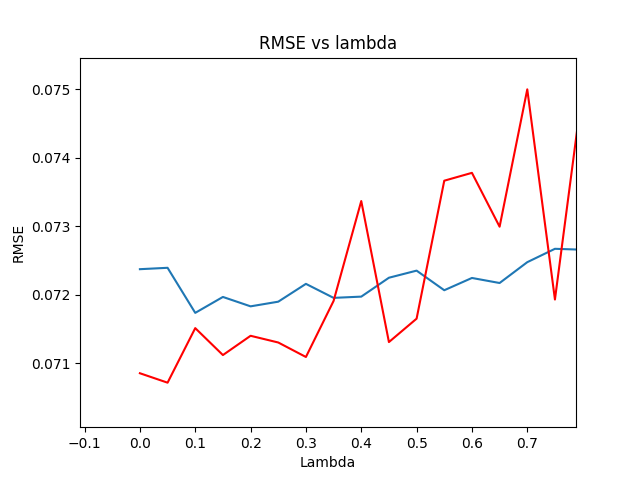

In [243]:
#Grafica de rmse vs lambda
%matplotlib notebook
plt.plot(np.arange(0,3,0.05), lambda_train_rmse)

plt.plot(np.arange(0,3,0.05), lambda_cv_rmse, color='red')

plt.title('RMSE vs lambda')
plt.xlabel('Lambda')
plt.ylabel('RMSE')


plt.show()

Se puede ver que, al hacer zoom, el mejor lambda es 0.1. Esto es ya que, los RMSE parecen converger en este punto y, además, es el menor RMSE para training.

<IPython.core.display.Javascript object>


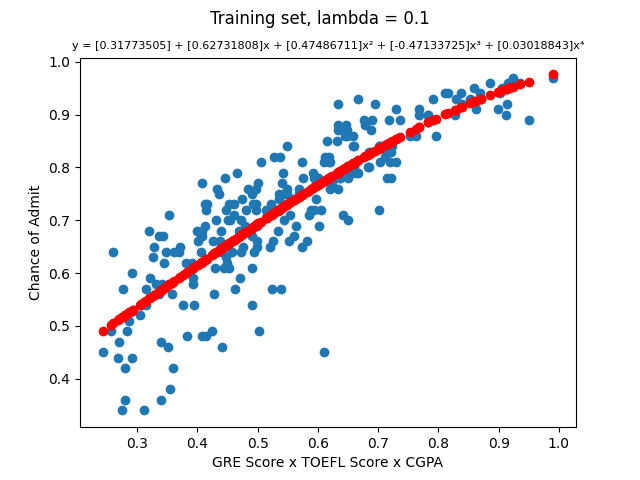

In [179]:
%matplotlib notebook
plt.scatter(train_X2_4[:,1], train_y)

plt.scatter(train_X2_4[:,1], np.matmul(train_X2_4, lambda_thetas[lambdas.index(0.1)]), color='red')

plt.suptitle('Training set, lambda = 0.1')
plt.title('y = {} + {}x + {}x² + {}x³ + {}x⁴'.format(np.array2string(lambda_thetas[lambdas.index(0.1)][0]),np.array2string(lambda_thetas[lambdas.index(0.1)][1]),np.array2string(lambda_thetas[lambdas.index(0.1)][2]),np.array2string(lambda_thetas[lambdas.index(0.1)][3]),np.array2string(lambda_thetas[lambdas.index(0.1)][4])), size='8')
plt.xlabel('GRE Score x TOEFL Score x CGPA')
plt.ylabel('Chance of Admit')


plt.show()

<IPython.core.display.Javascript object>


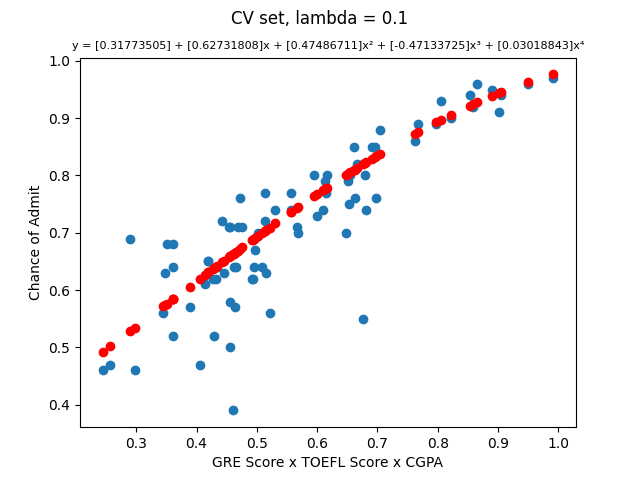

In [184]:
%matplotlib notebook
plt.scatter(cv_X2_4[:,1], cv_y)

plt.scatter(cv_X2_4[:,1], np.matmul(cv_X2_4, lambda_thetas[lambdas.index(0.1)]), color='red')

plt.suptitle('CV set, lambda = 0.1')
plt.title('y = {} + {}x + {}x² + {}x³ + {}x⁴'.format(np.array2string(lambda_thetas[lambdas.index(0.1)][0]),np.array2string(lambda_thetas[lambdas.index(0.1)][1]),np.array2string(lambda_thetas[lambdas.index(0.1)][2]),np.array2string(lambda_thetas[lambdas.index(0.1)][3]),np.array2string(lambda_thetas[lambdas.index(0.1)][4])), size='8')
plt.xlabel('GRE Score x TOEFL Score x CGPA')
plt.ylabel('Chance of Admit')


plt.show()

In [185]:
print('R² training degree 4 lambda 0.1:',r_squared(train_X2_4, train_y, lambda_thetas[lambdas.index(0.1)]))
print('R² cross validation degree 4 lambda 0.1:',r_squared(cv_X2_4, cv_y, lambda_thetas[lambdas.index(0.1)]))

print('RMSE training degree 4 lambda 0.1:',rmse(train_X2_4, train_y, lambda_thetas[lambdas.index(0.1)]))
print('RMSE cross validation degree 4 lambda 0.1:',rmse(cv_X2_4, cv_y, lambda_thetas[lambdas.index(0.1)]))

R² training degree 4 lambda 0.1: 0.7450949748908262
R² cross validation degree 4 lambda 0.1: 0.7211077383708056
RMSE training degree 4 lambda 0.1: 0.07173626477369471
RMSE cross validation degree 4 lambda 0.1: 0.07151351263875777


Utilizar un lambda de 0.1 aumenta el R² del modelo y, aunque la diferencia de RMSE's es mayor a la de lambda=0, este cambio es mínimo.

In [214]:
# Grafica rmse vs sample sample size
rmse_train_size=[]
rmse_cv_size=[]

for i in range(1,cv_X2_4.shape[0]+1,1):
    rmse_train_size.append(rmse(train_X2_4[0:i], train_y[0:i], lambda_thetas[lambdas.index(0.1)]))
    rmse_cv_size.append(rmse(cv_X2_4[0:i], cv_y[0:i], lambda_thetas[lambdas.index(0.1)]))

<IPython.core.display.Javascript object>


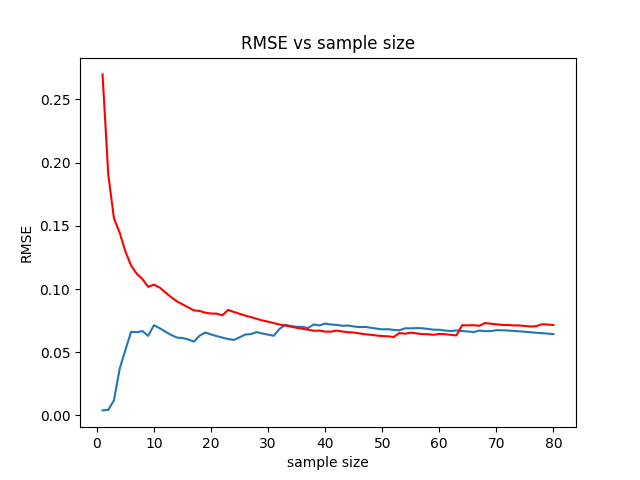

In [215]:
%matplotlib notebook
plt.plot(range(1,cv_X2_4.shape[0]+1,1), rmse_train_size)

plt.plot(range(1,cv_X2_4.shape[0]+1,1), rmse_cv_size, color='red')

plt.title('RMSE vs sample size')
plt.xlabel('sample size')
plt.ylabel('RMSE')


plt.show()

Ya que los R² y RMSE no parecen variar entre este modelo y el original de grado 4, comparemos sus resultados con el test set.

### Evaluando con el test set

In [231]:
test['CGPA x GRE x TOEFL'] = test[['CGPA']].to_numpy()*test[['GRE Score']].to_numpy()*test[['TOEFL Score']].to_numpy()

test_x2 = test[['CGPA x GRE x TOEFL']].to_numpy().T

test_X2= np.vstack((
    np.ones(test_x2.shape[1]),
    test_x2
)).T
test_X2_4= np.vstack((
    np.ones(test_x2.shape[1]),
    test_x2,
    test_x2**2,
    test_x2**3,
    test_x2**4,
)).T
test_y = test[['Chance of Admit ']].to_numpy()

<IPython.core.display.Javascript object>


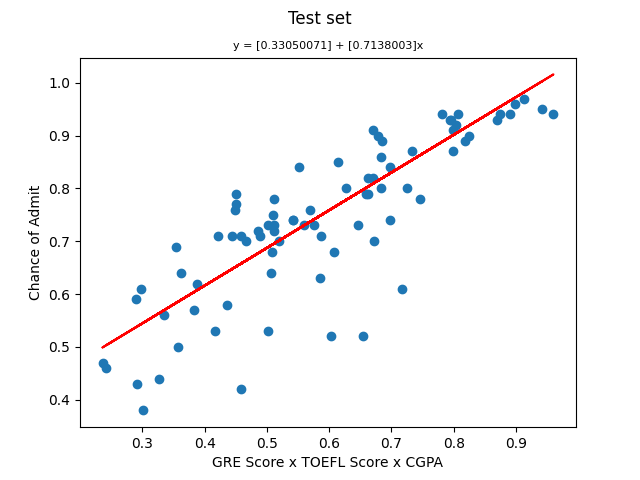

In [245]:
%matplotlib notebook
plt.scatter(test_X2[:,1], test_y)
plt.plot(test_X2[:,1], np.matmul(test_X2, thetas2), color='red')
plt.suptitle('Test set')
plt.title('y = {} + {}x'.format(np.array2string(thetas2[0]),np.array2string(thetas2[1])), size='8')
plt.xlabel('GRE Score x TOEFL Score x CGPA')
plt.ylabel('Chance of Admit')

plt.show()

<IPython.core.display.Javascript object>


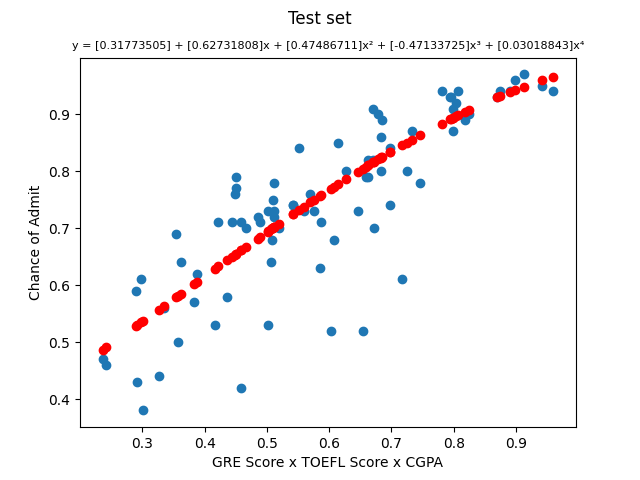

In [244]:
%matplotlib notebook

plt.scatter(test_X2_4[:,1], test_y)
plt.scatter(test_X2_4[:,1], np.matmul(test_X2_4, lambda_thetas[lambdas.index(0.1)]), color='red')
plt.suptitle('Test set')
plt.title('y = {} + {}x + {}x² + {}x³ + {}x⁴'.format(np.array2string(lambda_thetas[lambdas.index(0.1)][0]),np.array2string(lambda_thetas[lambdas.index(0.1)][1]),np.array2string(lambda_thetas[lambdas.index(0.1)][2]),np.array2string(lambda_thetas[lambdas.index(0.1)][3]),np.array2string(lambda_thetas[lambdas.index(0.1)][4])), size='8')
plt.xlabel('GRE Score x TOEFL Score x CGPA')
plt.ylabel('Chance of Admit')


plt.show()

In [241]:
print('R² test degree 4 lambda 0.1:',r_squared(test_X2_4, test_y, lambda_thetas[lambdas.index(0.1)]))
print('RMSE test degree 4 lambda 0.1:',rmse(test_X2_4, test_y, lambda_thetas[lambdas.index(0.1)]))
print('')
print('R² test degree 1 lambda 0:',r_squared(test_X2, test_y, thetas2))
print('RMSE test degree 1 lambda 0:',rmse(test_X2, test_y, thetas2))

R² test degree 4 lambda 0.1: 0.680444435614703
RMSE test degree 4 lambda 0.1: 0.08428235569205288

R² test degree 1 lambda 0: 0.6787551015896985
RMSE test degree 1 lambda 0: 0.0845048418384885


## Conclusión
<br>Debido a la forma de los datos, tanto en test, cross validation y test, se puede ver que mientras más alto sea el resultado de la multiplicación de las calificaciones normalizadas, mayor es la probabilidad de que sea aceptado. Como los datos están normalizados, al multiplicarse, cualquier nota baja tendrá más peso que las notas altas. Sin embargo, la regresión que es únicamente lineal, debido a que el valor máximo es 1, siempre sobreestimará los valores más grandes que tome x, haciendo que esta tienda a "aplanarse" o tener la forma de una asíntota horizontal en 1.

<br>Por lo tanto, para ajustarse a esta "asíntota", se puede observar que el polinomio de grado 4, regularizado con un lambda equivalente a 0.1, produce un mejor resultado. Por lo tanto, la propuesta de función hipótesis, la cual produce un R² de 0.68 y tiene una raíz de error cuadrático medio de 0.084, es la siguiente:
<br>
$h(x) = 0.31773505 + 0.62731808x + 0.47486711x^2 - 0.47133725x^3 + 0.03018843x^4$

Donde x es la multiplicación de las columnas Gre Score, TOEFL Score y CGPA normalizadas como se indica en las funciones norm_gre, norm_cgpa y norm_toefl.